In [1]:
from dsapol import dsapol
from dsapol import scatscint

In [22]:
x = np.load("/mnt/FRBdata/240203aacl_chromatica/240203aacl_chromatica_MCMC_samples.npy")


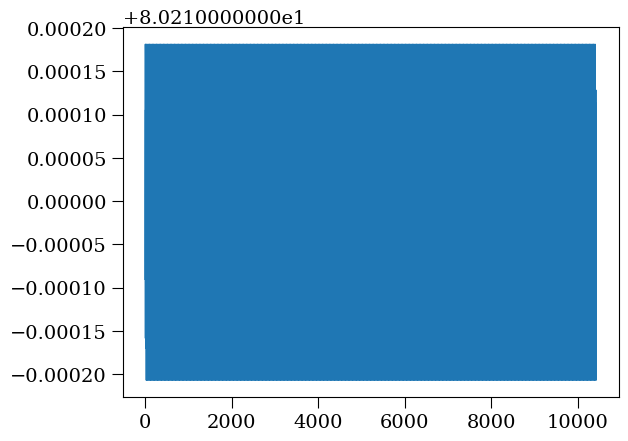

In [26]:
plt.plot(x[:,0])

In [2]:
from dsapol import dsapol

(I,Q,U,V,fobj,timeaxis,freq_test,wav_test,badchans) = dsapol.get_stokes_2D("/mnt/FRBdata/240203aacl_chromatica/","240203aacl_dev",5120,start=12800,
                                                                           n_t=1,n_f=1,n_off=int(2000//1),sub_offpulse_mean=True,fixchans=True,verbose=False,fixchansfile="/mnt/FRBdata/240203aacl_chromatica/badchans.npy",fixchansfile_overwrite=False)

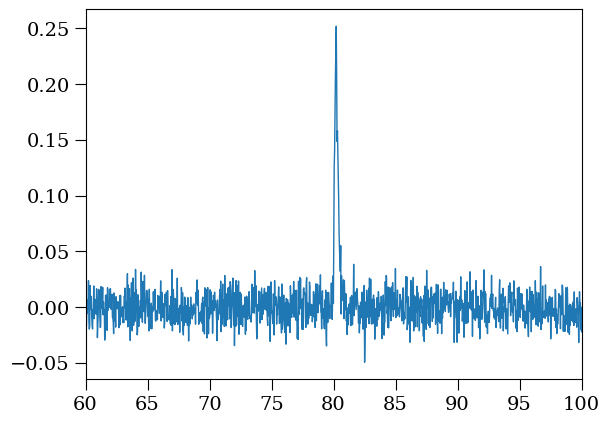

In [3]:
from matplotlib import pyplot as plt
import numpy as np
t = 32.7*np.arange(I.shape[1])

plt.figure()
plt.plot(t/1000,I.mean(0))
plt.xlim(60,100)
plt.show()

In [20]:
sampler = scatscint.run_MCMC_sampling(I.data.mean(0),outdir="/mnt/FRBdata/240203aacl_chromatica/",
                                label="240203aacl_chromatica",
                                p0=[80,0.25,1,0],comp_num=1,nlive=500,time_resolution=32.7e-3,timeaxis_for_fit=t/1000,
                                 low_bounds=[70,0,0.001,0],upp_bounds=[90,1,1,1],sigma_for_fit=I.std(0)/np.sqrt(I.shape[0]),
                                 background=False,resume=False,dlogz=1e-8,nsteps=500)

/home/ubuntu/msherman_nsfrb/miniconda/envs/casa38dsapol/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


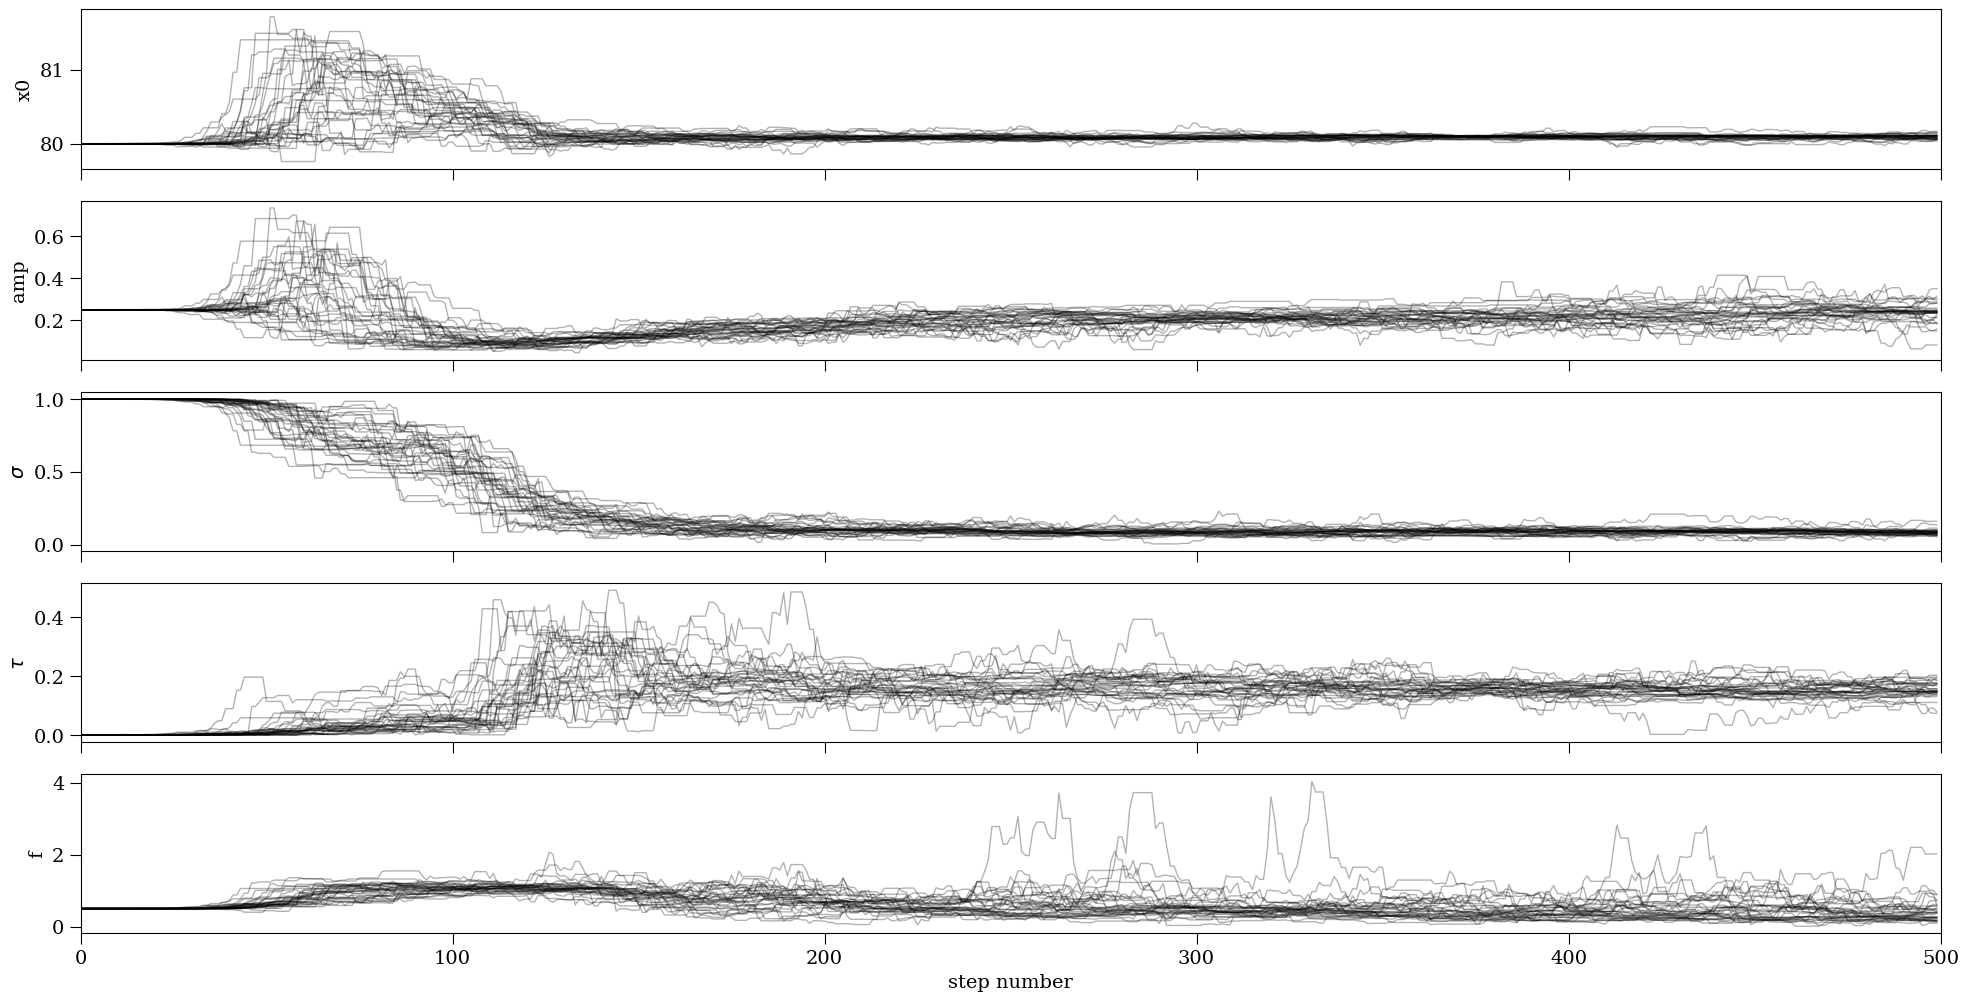

In [21]:
npars = ndim = 5
fig, axes = plt.subplots(npars, figsize=(24, 12), sharex=True)
samples = sampler.get_chain()
labels = ["x0","amp",r'$\sigma$',r'$\tau$','f']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
plt.show()

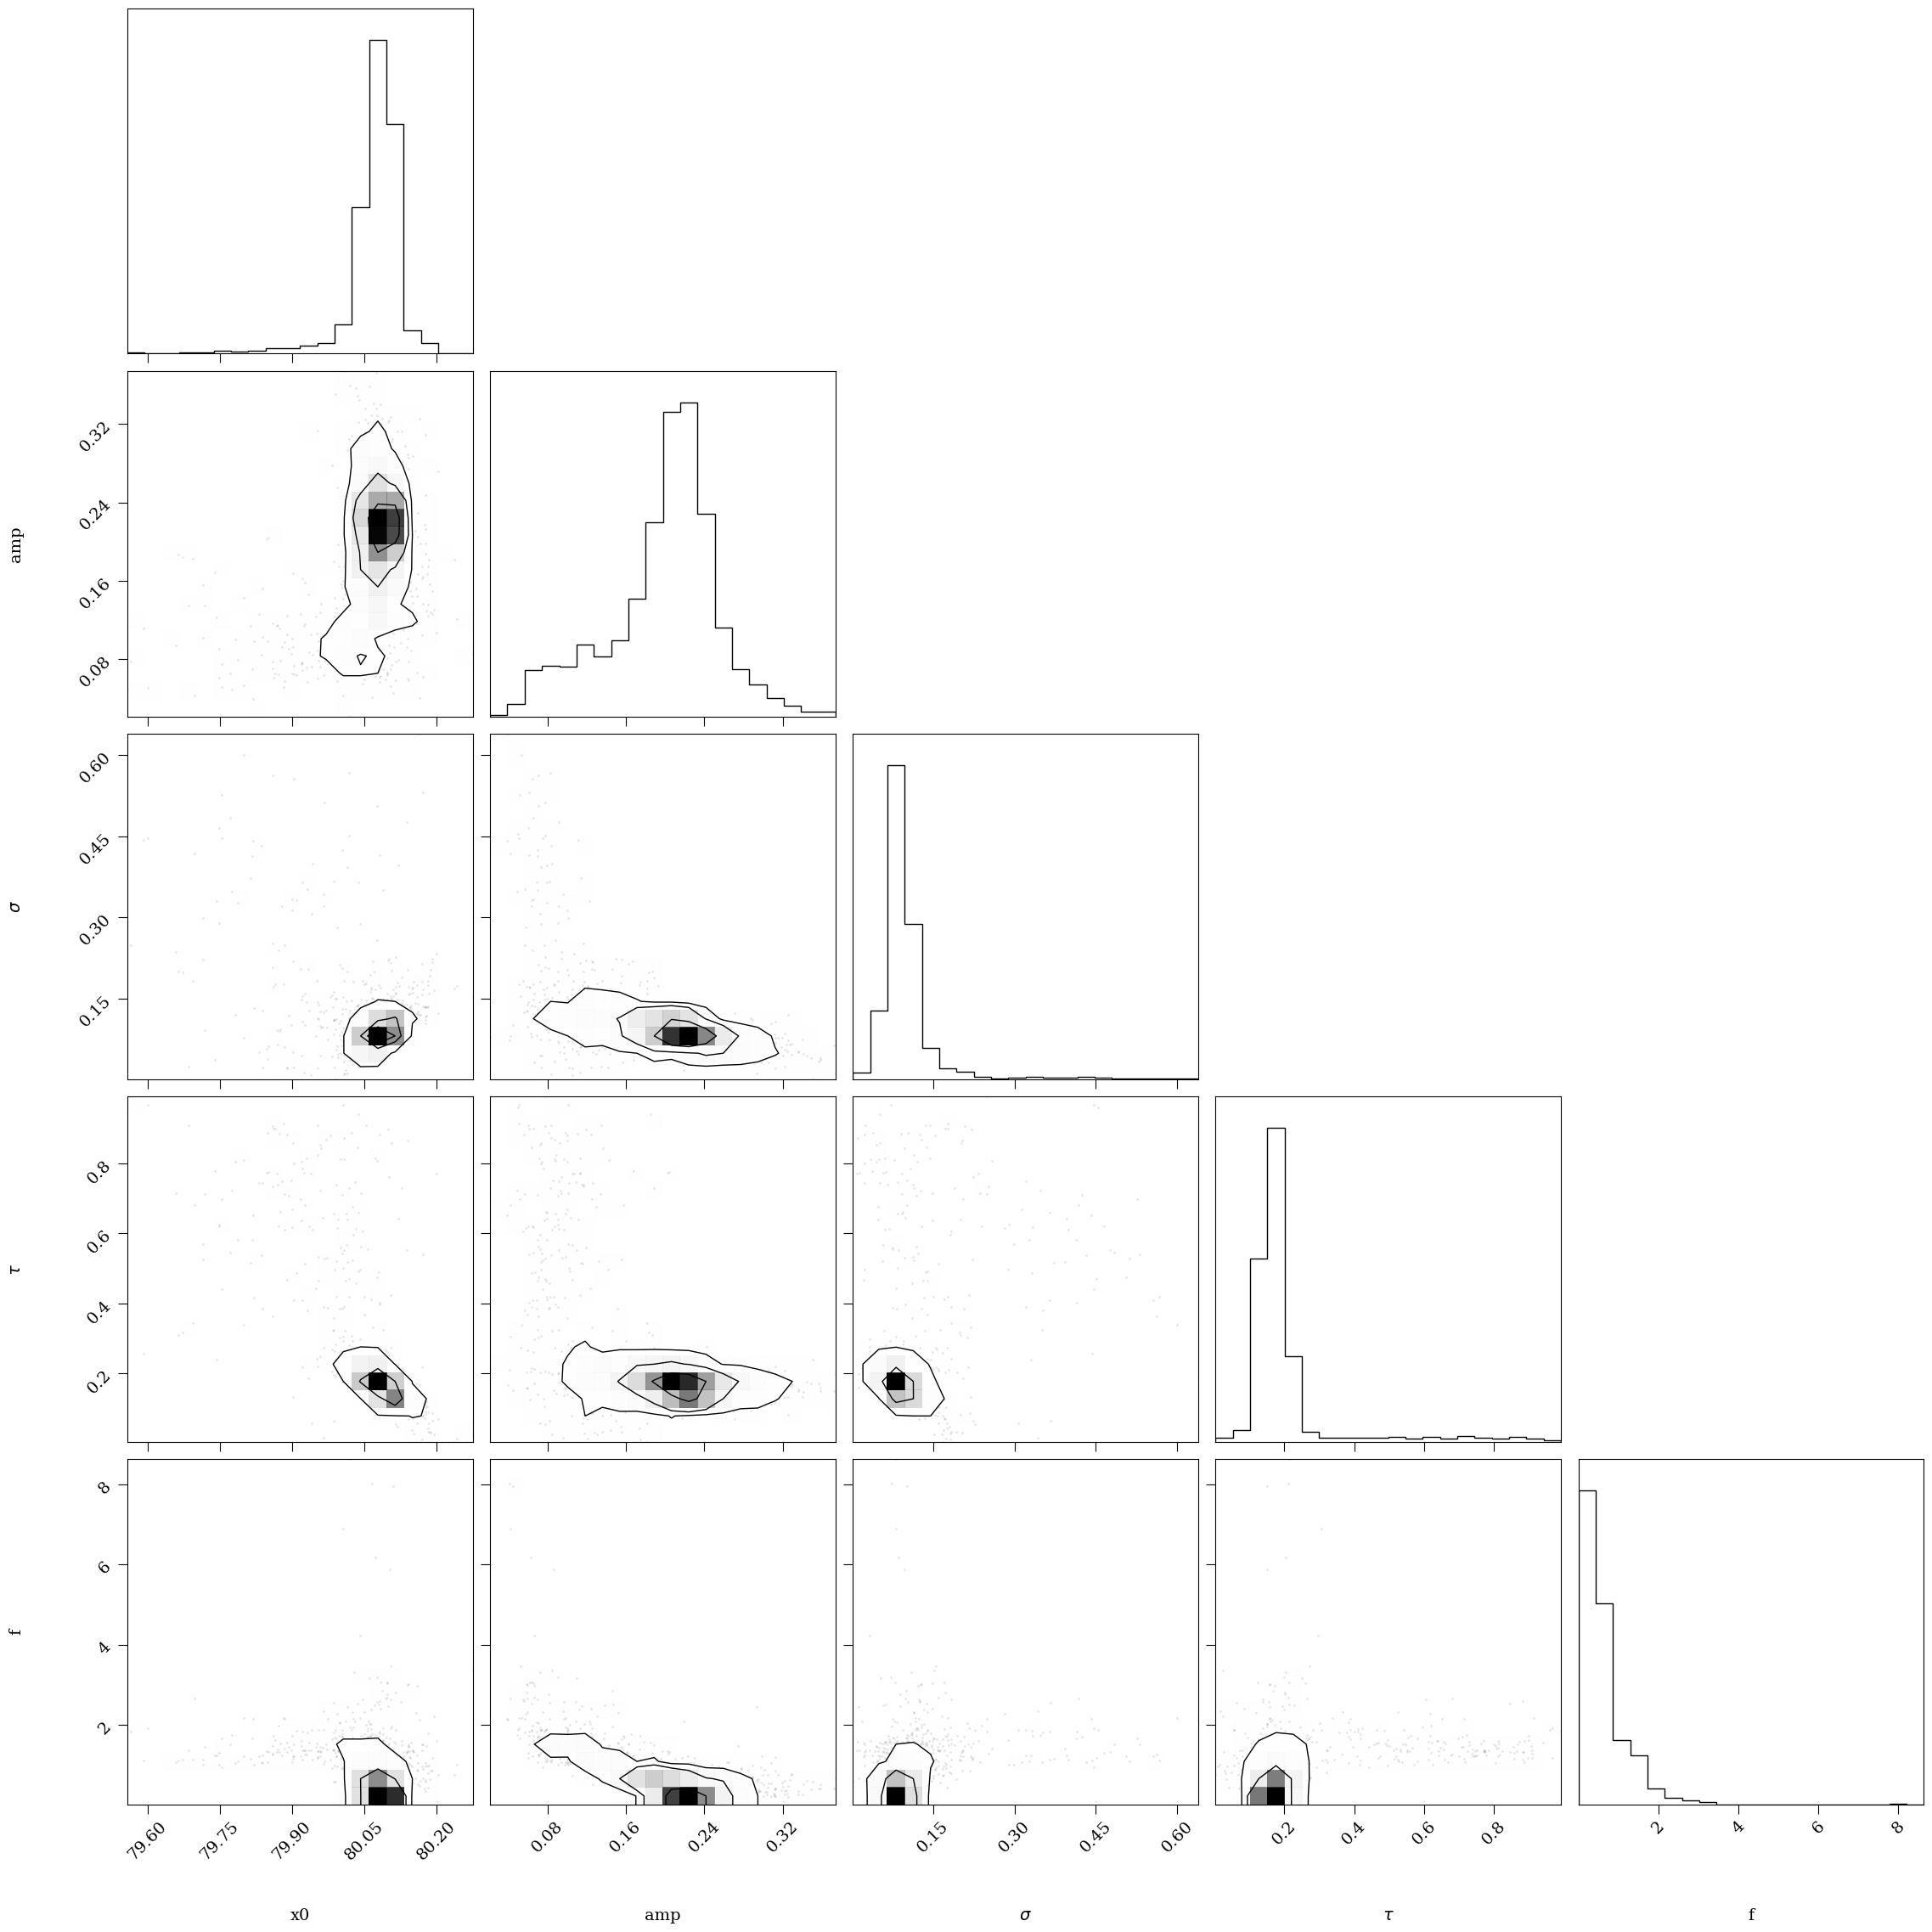

In [7]:
import corner
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
fig=plt.figure(figsize=(24,24))
corner.corner(
    flat_samples, labels=labels, fig=fig
);
plt.show()

In [17]:
np.nanpercentile(flat_samples,84,axis=0)

array([80.10861347,  0.24369123,  0.11703711,  0.21182939,  1.1252095 ])

In [8]:
from IPython.display import display, Math
params_plot = []
upperr_plot = []
lowerr_plot = []

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    params_plot.append(mcmc[1])
    q = np.diff(mcmc)
    upperr_plot.append(q[1])
    lowerr_plot.append(q[0])
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

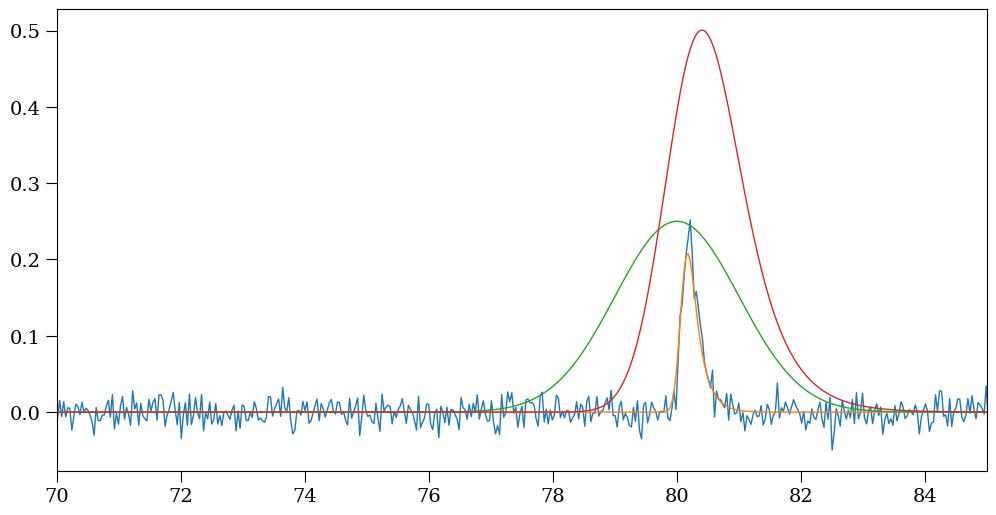

In [14]:
from scattering import scat
plt.figure(figsize=(12,6))

plt.plot(t/1000,I.mean(0))

plt.plot(t/1000,scat.exp_gauss_n(t/1000,*params_plot))
plt.plot(t/1000,scat.exp_gauss(t/1000,*[80,0.25,1,0]))



plt.plot(t/1000,scat.exp_gauss_n(t/1000,*list(r.nested_samples.to_numpy()[:,:4].mean(0))))
plt.xlim(70,85)
plt.show()

In [19]:
help(np.save)


Help on function save in module numpy:

save(file, arr, allow_pickle=True, fix_imports=True)
    Save an array to a binary file in NumPy ``.npy`` format.
    
    Parameters
    ----------
    file : file, str, or pathlib.Path
        File or filename to which the data is saved.  If file is a file-object,
        then the filename is unchanged.  If file is a string or Path, a ``.npy``
        extension will be appended to the filename if it does not already
        have one.
    arr : array_like
        Array data to be saved.
    allow_pickle : bool, optional
        Allow saving object arrays using Python pickles. Reasons for disallowing
        pickles include security (loading pickled data can execute arbitrary
        code) and portability (pickled objects may not be loadable on different
        Python installations, for example if the stored objects require libraries
        that are not available, and not all pickled data is compatible between
        Python 2 and Python 3).
  

In [3]:
from dsapol import scatscint
from scattering import scat

In [12]:
r= scatscint.run_nested_sampling(I.data.mean(0),outdir="/mnt/FRBdata/240203aacl_chromatica/",
                                label="240203aacl_chromatica",
                                p0=[80,0.25,1,0],comp_num=1,nlive=500,time_resolution=32.7e-3,timeaxis_for_fit=t/1000,
                                 low_bounds=[70,0,0.001,0],upp_bounds=[90,1,1,1],sigma_for_fit=I.std(0)/np.sqrt(I.shape[0]),
                                 background=False,resume=False)

/home/ubuntu/msherman_nsfrb/miniconda/envs/casa38dsapol/lib/python3.8/site-packages/bilby/core/utils/plotting.py:56: DeprecationWarning: Use shutil.which instead of find_executable
  if find_executable("latex"):


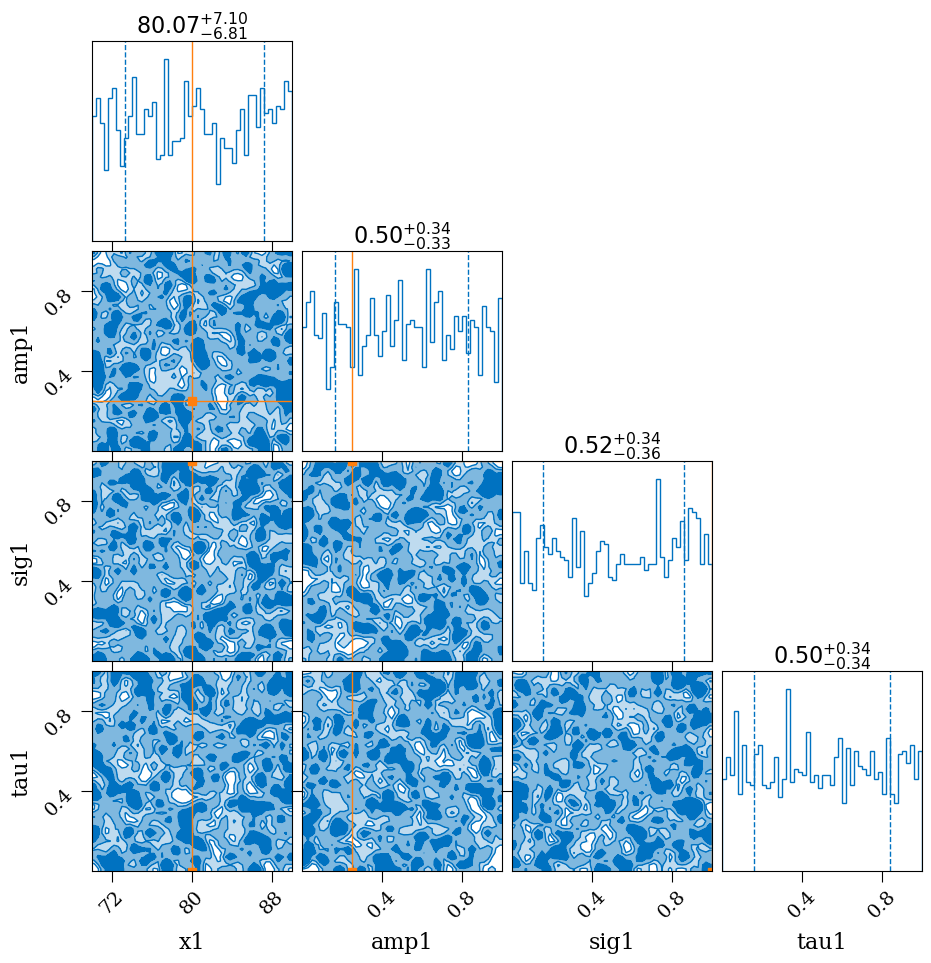

In [13]:
import corner

r.plot_corner()

In [23]:
r.samples.shape

(9721, 4)

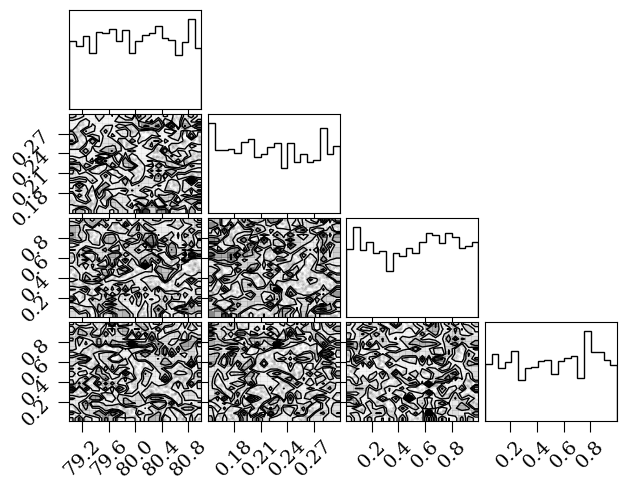

In [27]:
import corner
nburn=6000
f = plt.figure()
corner.corner(r.nested_samples.to_numpy()[nburn:,:4],weights=r.nested_samples['weights'][nburn:],fig=f)
plt.show()

In [109]:
import bilby

help(bilby.run_sampler_sampler)

Help on function run_sampler in module bilby.core.sampler:

run_sampler(likelihood, priors=None, label='label', outdir='outdir', sampler='dynesty', use_ratio=None, injection_parameters=None, conversion_function=None, plot=False, default_priors_file=None, clean=None, meta_data=None, save=True, gzip=False, result_class=None, npool=1, **kwargs)
    The primary interface to easy parameter estimation
    
    Parameters
    likelihood: `bilby.Likelihood`
        A `Likelihood` instance
    priors: `bilby.PriorDict`
        A PriorDict/dictionary of the priors for each parameter - missing
        parameters will use default priors, if None, all priors will be default
    label: str
        Name for the run, used in output files
    outdir: str
        A string used in defining output files
    sampler: str, Sampler
        The name of the sampler to use - see
        `bilby.sampler.get_implemented_samplers()` for a list of available
        samplers.
        Alternatively a Sampler object ca

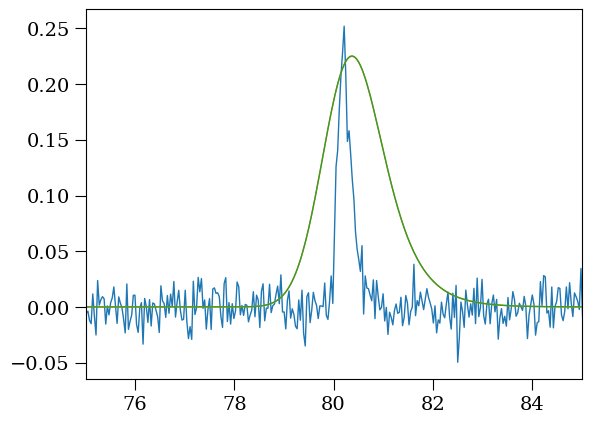

In [81]:
plt.figure()
plt.plot(t/1000,I.mean(0))
plt.plot(t/1000,scat.exp_gauss_n(t/1000,*list(r.samples.mean(0))))
plt.plot(t/1000,scat.exp_gauss_n(t/1000,*list(r.nested_samples.to_numpy()[:,:4].mean(0))))
plt.xlim(75,85)
plt.show()

(array([509., 463., 494., 537., 474., 489., 513., 504., 502., 545.]),
 array([79.00031013, 79.20026405, 79.40021797, 79.60017188, 79.8001258 ,
        80.00007972, 80.20003363, 80.39998755, 80.59994147, 80.79989538,
        80.9998493 ]),
 <BarContainer object of 10 artists>)

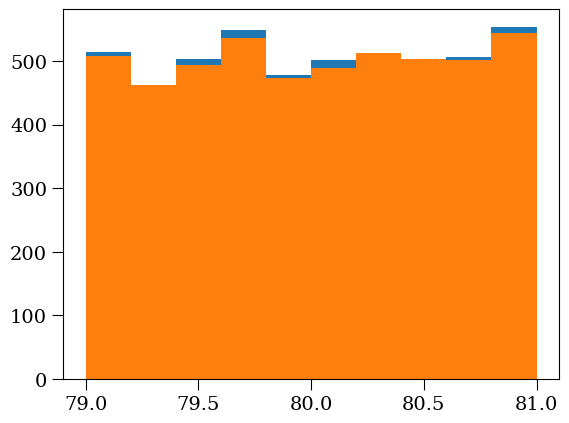

In [65]:
plt.hist(r.samples[:,0])
plt.hist(r.nested_samples.to_numpy()[:,0])

In [61]:
r.samples.shape

(5030, 4)

In [62]:
r.nested_samples.shape

(5030, 6)

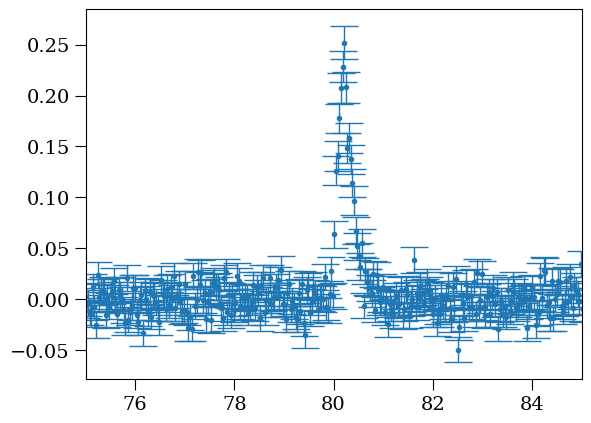

In [54]:
plt.figure()
plt.errorbar(t/1000,I.mean(0),yerr=I.std(0)/np.sqrt(I.shape[0]),marker='.',linestyle='',capsize=10)
#plt.plot(t/1000,I.mean(0))
plt.xlim(75,85)
plt.show()